# Week 3 - Modern Digital Technologies in Text Analysis

# Accessing Text Corpora and Lexical Resources

In this seminar we address these questions:

1. What are some useful text corpora and lexical resources, and how can we access them with Python?
2. Which Python constructs are most helpful for this work?
3. How do we avoid repeating ourselves when writing Python code?

# **1. Acessing Text Corpora**

## **1.1 Gutenberg Corpus**

NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books.

In [ ]:
import nltk

In [ ]:
print(nltk.corpus.gutenberg.fileids())

In [ ]:
# Let's pick up one
# How many words contains?
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

len(emma)

In [ ]:
em1 = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
em1.concordance("surprize")

Let's avoid writing a long name for our corpus (nltk.corpus.gutenberg...)

In [ ]:
from nltk.corpus import gutenberg

print(gutenberg.fileids())

In [ ]:
emma = gutenberg.words('austen-emma.txt')

emma

- Let's claculate some statistics about our Gutenberg resource

This program displays three statistics for each text: **average word length**, **average sentence length**, and **the number of times each vocabulary item appears in the text** on average (our lexical diversity score)

- **Point**: The average word length is really not these numbers, since the num_chars variable counts space characters.

**Q:** How we can access to the "raw" text of the book? (Not split up into tokens)

**Ans:**  The **raw()** function gives us the contents of the file without any linguistic processing.

**len(gutenberg.raw('blake-poems.txt'))** tells us how many letters occur in the text, including the spaces between words.

In [ ]:
for fileid in gutenberg.fileids():
    num_char = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_char/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

The *sents()* function divides the text up into its sentences, where each sentence is a list of words:

Each sentence in a text will be a list of words.

In [ ]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

In [ ]:
# Let's access to one of the sentences
macbeth_sentences[100]

In [ ]:
# Return the longest sentences in the text
# longest_len = 158

longest_len = max(len(sen) for sen in macbeth_sentences)
print(f'The length of the longest sentence is: {longest_len}\n')

print([s for s in macbeth_sentences if len(s) == longest_len][0])

What else we can use in NLTK as corpus?
1. Webtext
2. Brown
3. Reuters

## **1.2 Web and Chat Text**

Although Project Gutenberg contains thousands of books, it represents established literature. It is important to consider less formal language as well. NLTK's small collection of web text includes content from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine reviews:

In [ ]:
from nltk.corpus import webtext

In [ ]:
for fileid in webtext.fileids():
    print(fileid, '---> ', webtext.raw(fileid)[:60], '.....')

There is also a corpus of instant messaging chat sessions, originally collected by the Naval Postgraduate School for research on automatic detection of Internet predators. The corpus contains over 10,000 posts, anonymized by replacing usernames with generic names of the form "UserNNN", and manually edited to remove any other identifying information. 

The corpus is organized into 15 files, where each file contains several hundred posts collected on a given date, for an age-specific chatroom (teens, 20s, 30s, 40s, plus a generic adults chatroom). The filename contains the date, chatroom, and number of posts; e.g., 10-19-20s_706posts.xml contains 706 posts gathered from the 20s chat room on 10/19/2006.

In [ ]:
from nltk.corpus import nps_chat

chatroom = nps_chat.posts('10-19-20s_706posts.xml')
print(chatroom[123])

## **1.3 Brown Corpus**

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on.

In [ ]:
from nltk.corpus import brown

print(brown.categories())

In [ ]:
brown.words(categories='news')

In [ ]:
brown.sents(categories=['news', 'adventure'])

- The Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as **stylistics**. Let's compare genres in their usage of modal verbs. The first step is to produce the counts for a particular genre.

In [ ]:
news_text = brown.words(categories='news')

fdist = nltk.FreqDist(w.lower() for w in news_text)

modals = ['can', 'could', 'may', 'might', 'must', 'will']

for m in modals:
    print(m + ':', fdist[m], end=' \n')

In [ ]:
# Frequency Distribution is a dictionary

fdist

### **Exercise**
- Do the same Procedure for wh words for different genre: (*what, when, where, who, and why*)

In [ ]:
<YOUR CODE>

<a id='conditionalFreqDist_table'></a>

- Next, we need to obtain counts for each genre of interest. We'll use NLTK's support for conditional frequency distributions.

In [ ]:
cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'romance']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)

## **1.4 Reuters Corpus**

The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test"; thus, the text with fileid 'test/14826' is a document drawn from the test set. This split is for training and testing algorithms that automatically detect the topic of a document.

In [ ]:
from nltk.corpus import reuters

print(reuters.fileids())

In [ ]:
print(reuters.categories())

- Unlike the Brown Corpus, categories in the Reuters corpus overlap with each other, simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more categories. For convenience, the corpus methods accept a single fileid or a list of fileids.



In [ ]:
reuters.categories('training/9865')

In [ ]:
reuters.categories(['training/9865', 'test/15096', 'test/15103'])

In [ ]:
reuters.fileids('barley')

In [ ]:
reuters.fileids(['barley', 'corn'])

Similarly, we can specify the words or sentences we want in terms of files or categories. The first handful of words in each of these texts are the titles, which by convention are stored as upper case.

In [ ]:
print(reuters.words('test/15728')[:15])

In [ ]:
reuters.words(['test/15728', 'test/15106'])

In [ ]:
reuters.words(categories='barley')

In [ ]:
reuters.words(categories=['barley', 'corn'])

## **1.5 Corpora in Other Languages**

NLTK comes with corpora for many languages, though in some cases you will need to learn how to manipulate character encodings in Python before using these corpora.

In [ ]:
# Espanish

nltk.corpus.cess_esp.words()

In [ ]:
# Portuguese

nltk.corpus.floresta.words()

In [ ]:
# Hindi

nltk.corpus.indian.words('hindi.pos')

In [ ]:
# Different Languages file ids

nltk.corpus.udhr.fileids()

In [ ]:
nltk.corpus.udhr.words('Farsi_Persian-UTF8')

- The last of these corpora, udhr, contains the Universal Declaration of Human Rights in over 300 languages. The fileids for this corpus include information about the character encoding used in the file, such as UTF8 or Latin1. Let's use a conditional frequency distribution to examine the differences in word lengths for a selection of languages included in the udhr corpus.

<a id='conditionalFreqDist_plot'></a>

In [ ]:
from nltk.corpus import udhr
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))

cfd.plot()

In [ ]:
plt.figure(figsize=(10, 6))

cfd.plot(cumulative=True)

## **1.6 Text Corpus Structure**

These corpora we have seen are the collection of text. Often, texts are grouped into categories that might correspond to genre, source, author, language, etc. Sometimes these categories overlap, notably in the case of topical categories as a text can be relevant to more than one topic. Occasionally, text collections have temporal structure, news collections being the most common example.

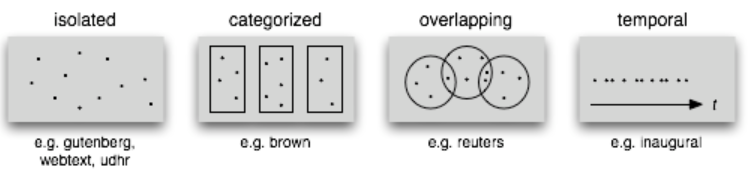

Figure: Common Structures for Text Corpora: The simplest kind of corpus is a collection of isolated texts with no particular organization; some corpora are structured into categories like genre (Brown Corpus); some categorizations overlap, such as topic categories (Reuters Corpus); other corpora represent language use over time (Inaugural Address Corpus).

- Basic Corpus Functionality defined in NLTK


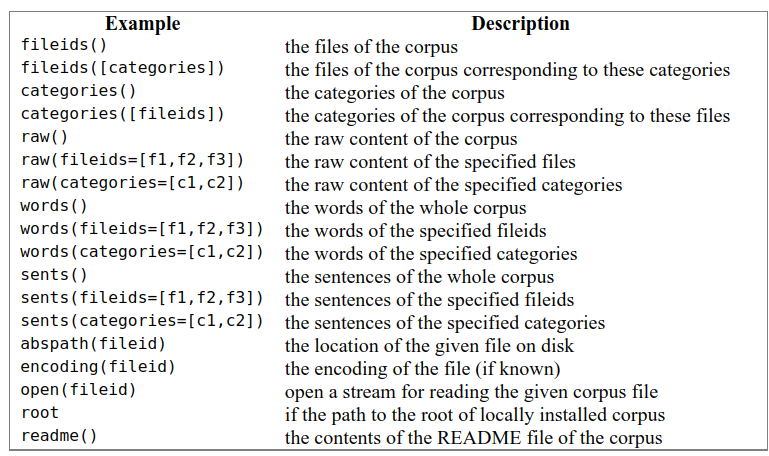

# **2. Conditional Frequency Distributions**

When the texts of a corpus are divided into several categories, by genre, topic, author, etc, we can maintain separate frequency distributions for each category. This will allow us to study systematic differences between the categories. 

In the previous section we used NLTK's *ConditionalFreqDist* data type. 

A **conditional frequency distribution** is a collection of frequency distributions, each one for a different "condition". The condition will often be the category of the text. 

The figure bellow depicts a fragment of a conditional frequency distribution having just two conditions, one for news text and one for romance text.

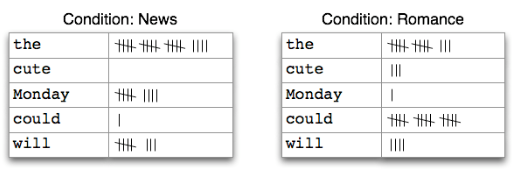

**Figure** Counting Words Appearing in a Text Collection (a conditional frequency distribution)

Example of input

```
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]
```

Each pair has the form (condition, event). If we were processing the entire Brown Corpus by genre there would be 15 conditions (one per genre), and 1,161,192 events (one per word)

## **2.2 Counting Words by Genre**

In [ ]:
from nltk.corpus import brown

# Write a program taht calculates the conditional frequency distribution based on the genre and word

cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))

- Let's break this down, and look at just two genres, news and romance. For each genre [2], we loop over every word in the genre [3], producing pairs consisting of the genre and the word [1]:

In [ ]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]

len(genre_word)

In [ ]:
genre_word[:20]

In [ ]:
genre_word[-20:]

- We can now use this list of pairs to create a *ConditionalFreqDist*, and save it in a variable **cfd**. As usual, we can type the name of the variable to inspect it, and verify it has two conditions:

In [ ]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

In [ ]:
cfd.conditions()

- Let's access the two conditions, and satisfy ourselves that each is just a frequency distribution:

In [ ]:
print(cfd['news'])

In [ ]:
print(cfd['romance'])

In [ ]:
cfd['romance'].most_common(20)

In [ ]:
cfd['romance']['could']

## **2.3   Plotting and Tabulating Distributions**


*ConditionalFreqDist* provides some useful methods for tabulation and plotting.

Reference to Table: [Making Table](#conditionalFreqDist_table)

Reference to Plot: [Making Plot](#conditionalFreqDist_plot)

# **3. More Python: Reusing Code**

In [ ]:
<FUNCTION>

# **4. Lexical Resources**

A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. 

Lexical resources are secondary to texts, and are usually created and enriched with the help of texts. 

For example, if we have defined a text *my_text*, then *vocab = sorted(set(my_text))* builds the vocabulary of *my_text*, while *word_freq = FreqDist(my_text)* counts the frequency of each word in the text. Both of **vocab** and **word_freq** are simple lexical resources.

- A **lexical entry** consists of a **headword** (also known as a **lemma**) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called **homonyms**.

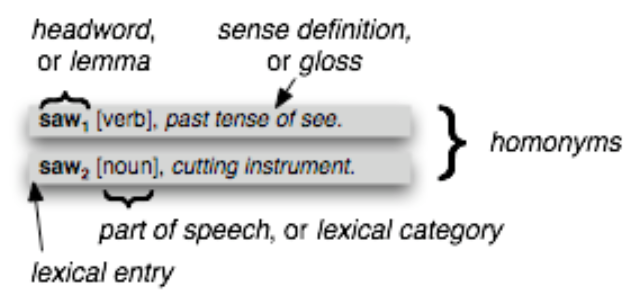

**Figure:** Lexicon Terminology: lexical entries for two lemmas having the same spelling (homonyms), providing part of speech and gloss information.

The simplest kind of lexicon is nothing more than a sorted list of words. Sophisticated lexicons include complex structure within and across the individual entries. In this section we'll look at some lexical resources included with NLTK.

## **4.1   Wordlist Corpora**

Filtering a Text: this program computes the vocabulary of a text, then removes all items that occur in an existing wordlist, leaving just the uncommon or mis-spelt words.

In [ ]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocabs = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocabs
    return sorted(unusual)
    
unusual_words(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [ ]:
unusual_words(nltk.corpus.nps_chat.words())

**Stopwords** that are high-frequency words like **the**, **to** and **also** that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [ ]:
from nltk.corpus import stopwords

stopwords.words('english')

- Let's define a function to compute what fraction of words in a text are not in the stopwords list:

In [ ]:
def count_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    
#     content = []
#     for w in text:
#         if (w.lower() not in stopwords):
#             content.append(w)
            
    return len(content) / len(text)
    

count_fraction(nltk.corpus.reuters.words())

Thus, with the help of stopwords we filter out over a quarter of the words of the text. Notice that we've combined two different kinds of corpus here, using a lexical resource to filter the content of a text corpus.

- One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. 

Let's find names which appear in both files, i.e. names that are ambiguous for gender:

In [ ]:
names = nltk.corpus.names

names.fileids()

In [ ]:
male_names = names.words('male.txt')

female_names = names.words('female.txt')

[w for w in male_names if w in female_names]

- It is well known that names ending in the letter **a** are almost always female. We can see this and some other patterns in the graph in following, produced by the following code. Remember that *name[-1]* is the last letter of name.

In [ ]:
plt.figure(figsize=(10, 6))

cfd = nltk.ConditionalFreqDist(
            (fileid, name[-1])
            for fileid in names.fileids()
            for name in names.words(fileid))

cfd.plot()

## **4.2   A Pronouncing Dictionary**

A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.

In [ ]:
entries = nltk.corpus.cmudict.entries()
len(entries)

In [ ]:
entries

In [ ]:
for entry in entries[10000: 10010]:
    print(entry)

For each word, this lexicon provides a list of phonetic codes — distinct labels for each contrastive sound — known as phones. 

Observe that fire has two pronunciations (in US English): the one-syllable F AY1 R, and the two-syllable F AY1 ER0. The symbols in the CMU Pronouncing Dictionary are from the Arpabet, described in more detail at http://en.wikipedia.org/wiki/Arpabet


- Each entry consists of two parts, and we can process these individually using a more complex version of the for statement. Instead of writing for entry in entries:, we replace entry with two variable names, word, pron. Now, each time through the loop, word is assigned the first part of the entry, and pron is assigned the second part of the entry:

In [ ]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end='\n')

The above program scans the lexicon looking for entries whose pronunciation consists of three phones. If the condition is true, it assigns the contents of pron to three new variables ph1, ph2 and ph3.

- Here's another example of the same for statement, this time used inside a list comprehension. This program finds all words whose pronunciation ends with a syllable sounding like **nicks**. You could use this method to find rhyming words.

In [ ]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

- The phones contain digits to represent primary stress (1), secondary stress (2) and no stress (0). As our final example, we define a function to extract the stress digits and then scan our lexicon to find words having a particular stress pattern.

In [ ]:
def stress(pron):
    
    # Task: <instead of the one line for, write a normal for in several lines>
    
    return [char for phone in pron for char in phone if char.isdigit()]


[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

- Rather than iterating over the whole dictionary, we can also access it by looking up particular words. We will use Python's dictionary data structure. We look up a dictionary by giving its name followed by a key (such as the word 'fire') inside square brackets.

In [ ]:
prondict = nltk.corpus.cmudict.dict()
prondict

In [ ]:
prondict['fire']

## **4.3 Comparative Wordlists**


Another example of a tabular lexicon is the **comparative wordlist**. NLTK includes so-called Swadesh wordlists, lists of about 200 common words in several languages. The languages are identified using an ISO 639 two-letter code.

In [ ]:
from nltk.corpus import swadesh

print(swadesh.fileids())

In [ ]:
swadesh.words('en')

In [ ]:
swadesh.words('ru')

- We can access cognate words (from the same family) from multiple languages using the **entries()** method, specifying a list of languages. With one further step we can convert this into a simple dictionary

In [ ]:
fr2en = swadesh.entries(['fr', 'en'])

fr2en

In [ ]:
translate = dict(fr2en)
translate['chien']

In [ ]:
translate['jeter']

We can make our simple translator more useful by adding other source languages. Let's get the German-English and Spanish-English pairs, convert each to a dictionary using **dict()**, then **update** our original translate dictionary with these additional mappings:

In [ ]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])

translate.update(dict(de2en))
translate.update(dict(es2en))

translate['Hund']

In [ ]:
translate['perro']